In [64]:
import os
import pandas as pd
import sys 
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import re


In [106]:
# Read of our input files that have all the information collected about our genomes and the corresponding PGCfinder informations
df_brut = pd.read_csv('../results/lists_PGC/list_organisms_merged.csv')

# Read the csv already modified to have all the informations 
df_bryant= pd.read_csv('../data/supp_data_from_thiel_et_al_2018/table_3.tsv', sep='\t', header=0, na_values=['na'])
df_bryant_copy = df_bryant.copy()

df_all = pd.read_csv('../data/lists/list_with_taxonomy.csv', low_memory=False)

In [66]:
# Basic representation of our data
#df_brut.describe()

# Describe doesn't work with this df
df_bryant.describe()

,Unnamed: 9
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [67]:
# Creation of a clean dataframe
df_clean = df_brut.dropna(subset=['#Organism Name'])
#print(df_clean.describe())

# Creation of a PGC dataframe
df_PGC = df_clean[df_clean['number of genes'] > 24]
#print(df_PGC.describe())
df_PGC_alpha = df_PGC[df_PGC['Organism Groups'].str.contains('Alpha')]
df_PGC_beta = df_PGC[df_PGC['Organism Groups'].str.contains('Beta')]
df_PGC_gamma = df_PGC[df_PGC['Organism Groups'].str.contains('Gamma')]

df_PGC_alpha.describe()

,Size(Mb),GC%,Scaffolds,CDS,number of PGC,number of genes
count,209.000000,209.000000,209.000000,209.000000,209.0,209.000000
mean,4.899643,64.944662,2.760766,4429.540670,1.0,31.181818
std,1.356198,7.233613,2.248972,1284.818832,0.0,1.378215
min,2.663030,0.000000,1.000000,0.000000,1.0,25.000000
25%,3.893630,63.881200,1.000000,3543.000000,1.0,31.000000
50%,4.519620,65.500000,2.000000,4203.000000,1.0,31.000000
75%,5.661340,68.200000,4.000000,5159.000000,1.0,32.000000
max,8.493510,71.600000,9.000000,7530.000000,1.0,34.000000


In [68]:
# Stats by Class
print("Informations nettoyé: \n", df_clean['Organism Groups'].value_counts(), "\n")
print("Informations PGC: \n", df_PGC['Organism Groups'].value_counts(), "\n")
print("Informations Bryant: \n", df_bryant['Taxonomy'].value_counts())

Informations nettoyé: 
 Organism Groups
Bacteria;Pseudomonadota;Gammaproteobacteria    14900
Bacteria;Pseudomonadota;Betaproteobacteria      2580
Bacteria;Pseudomonadota;Alphaproteobacteria     2089
Bacteria;Pseudomonadota;Acidithiobacillia         17
Bacteria;Pseudomonadota;Zetaproteobacteria         2
Bacteria;Pseudomonadota;Hydrogenophilia            1
Name: count, dtype: int64 

Informations PGC: 
 Organism Groups
Bacteria;Pseudomonadota;Alphaproteobacteria    209
Bacteria;Pseudomonadota;Betaproteobacteria      30
Bacteria;Pseudomonadota;Gammaproteobacteria     14
Name: count, dtype: int64 

Informations Bryant: 
 Taxonomy
Alphaproteobacteria; Rhodobacterales; Rhodobacteraceae                                                      151
Alphaproteobacteria; Sphingomonadales; Sphingomonadaceae                                                     79
Alphaproteobacteria; Rhizobiales; Methylobacteriaceae                                                        72
Alphaproteobacteria; Sphingom

In [69]:
# Stats by Species
#print(df_clean['#Organism Name'].value_counts())
print(df_PGC['#Organism Name'].value_counts())

#Organism Name
Rhodopseudomonas palustris         10
Cereibacter sphaeroides             7
Methylorubrum extorquens            6
Bradyrhizobium cosmicum             2
Rhodobacter capsulatus              2
                                   ..
Methylobacterium sp. AMS5           1
Sphingomonas hengshuiensis          1
Methylorubrum zatmanii              1
Rhodopseudomonas palustris HaA2     1
Polynucleobacter sp. HIN11          1
Name: count, Length: 222, dtype: int64


In [70]:
# Stats by Genus
genus_clean = df_clean.loc[:, 'Genus'] = df_clean.loc[:, '#Organism Name'].str.split().str[0]
genus_PGC = df_PGC.loc[:, 'Genus'] = df_PGC['#Organism Name'].str.split().str[0]
genus_bryant = df_bryant.loc[:, 'Genus'] = df_bryant['Organism_name'].str.split().str[0]

genus_clean_counts = genus_clean.value_counts().sort_index()
genus_PGC_counts = genus_PGC.value_counts().sort_index()
genus_bryant_counts = genus_bryant.value_counts().sort_index()

# Aligner les indices pour correspondre aux genres présents dans les deux séries
aligned_genus_clean_counts, aligned_genus_PGC_counts = genus_clean_counts.align(genus_PGC_counts, fill_value=0)


# Calculer les pourcentages de genus_PGC par rapport à genus_clean
genus_percentage = (aligned_genus_PGC_counts / aligned_genus_clean_counts) * 100

# Afficher les 20 premiers genres en termes de pourcentage
#print(genus_percentage.sort_values(ascending=False).head(93))

print(genus_bryant_counts)


Organism_name
Acidiphilium       10
Acidisphaera        1
Aestuariivita       2
Afifella            2
Agrobacterium       3
                   ..
Tranquillimonas     1
Variovorax          1
gamma               1
marine              2
uncultured          2
Name: count, Length: 130, dtype: int64


/tmp/ipykernel_6042/4034465775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_clean = df_clean.loc[:, 'Genus'] = df_clean.loc[:, '#Organism Name'].str.split().str[0]
/tmp/ipykernel_6042/4034465775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_PGC = df_PGC.loc[:, 'Genus'] = df_PGC['#Organism Name'].str.split().str[0]


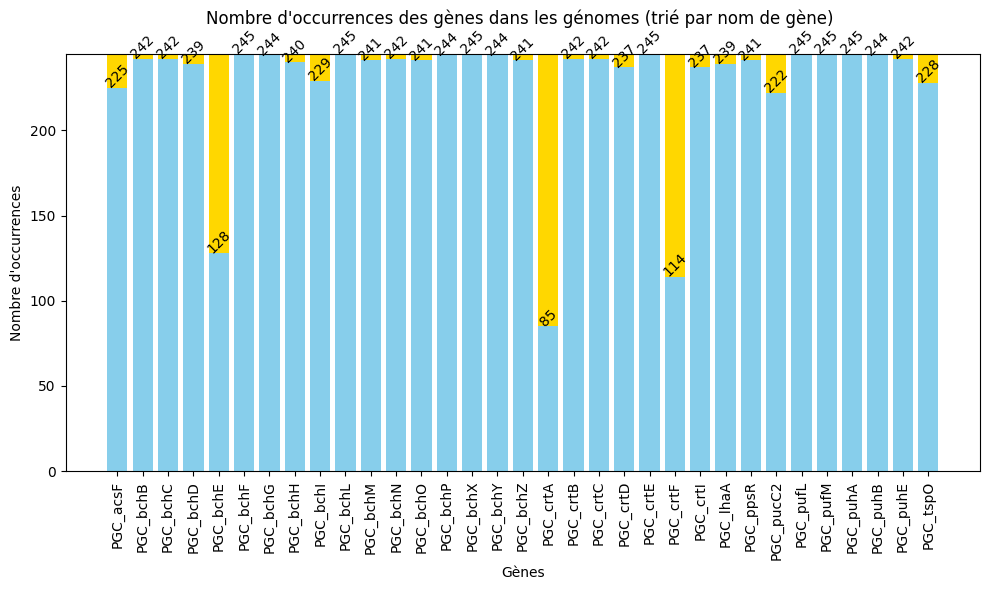

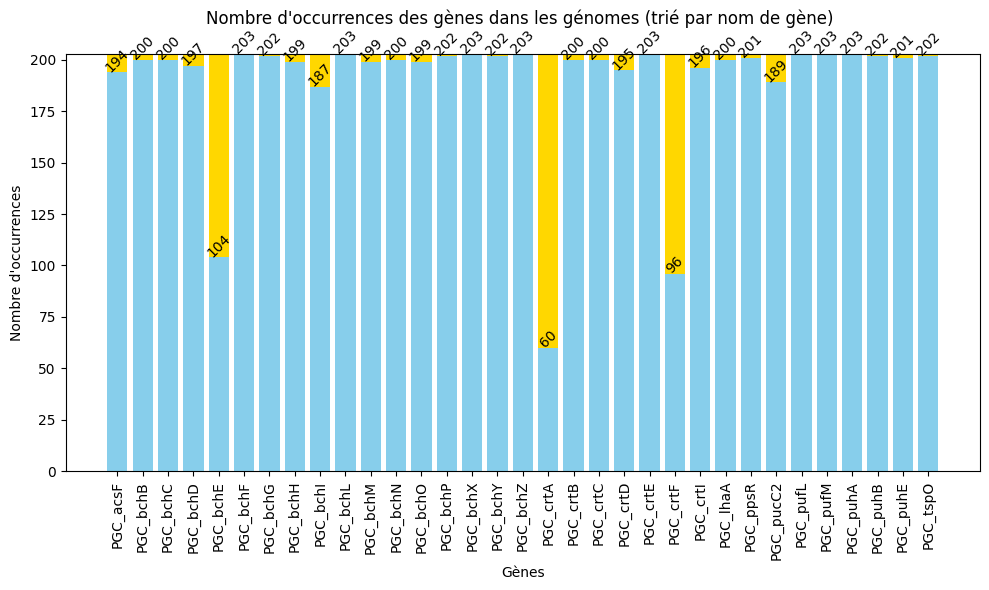

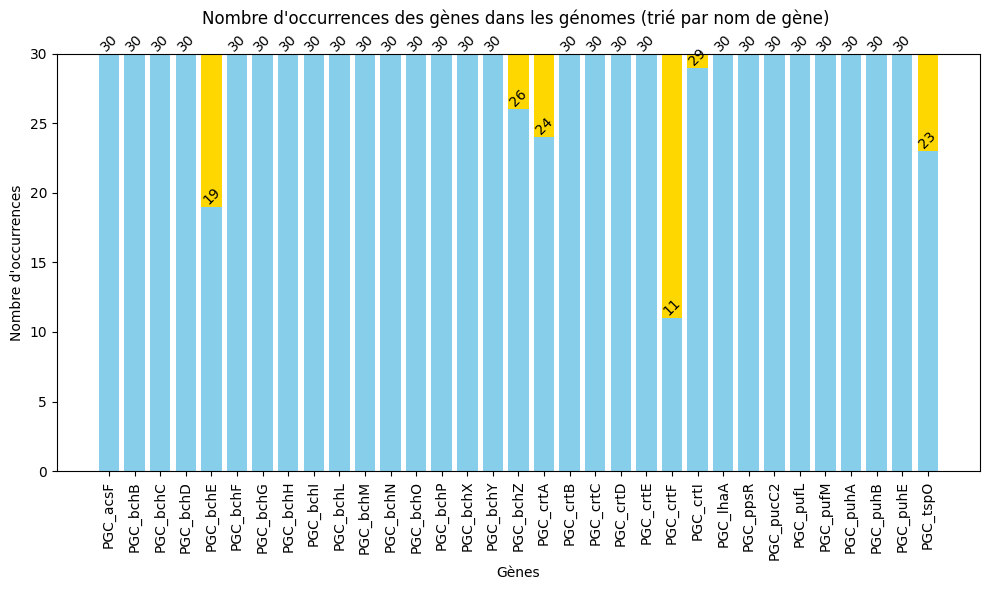

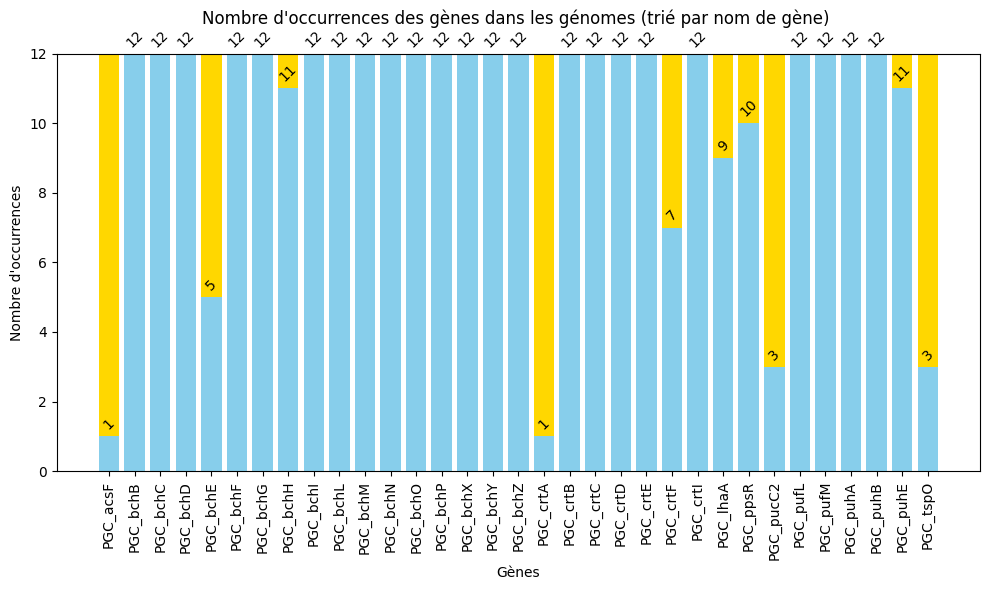

In [71]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def analyse_genomes(genomes):
    # Récupération des profils de gènes
    PROFILES = [os.path.splitext(os.path.basename(gene))[0] for gene in glob.glob("../data/profiles/*.hmm")]

    # Dictionnaire pour stocker les DataFrames
    dfs = {}

    for genome in genomes:
        path = f"../results/genomes_PGC/{genome}/PGCfinder/best_solution.tsv"
        dfs[genome] = pd.read_csv(path, sep='\t', comment='#')

    # Dictionnaire pour stocker les occurrences de chaque gène
    gene_counts = {gene: 0 for gene in PROFILES}

    # Boucle à travers chaque génome
    for genome in genomes:
        # Charger le DataFrame pour le génome actuel
        df = dfs[genome]
        
        # Boucle à travers chaque profil de gène
        for gene in PROFILES:
            # Vérifier si le gène est présent dans le DataFrame
            if gene in df['gene_name'].values:
                # Incrémenter le compte pour le gène actuel
                gene_counts[gene] += 1

    # Calculer le nombre total de génomes
    total_genomes = len(genomes)

    # Calculer la fréquence de chaque gène
    gene_frequencies = {gene: (count / total_genomes) * 100 for gene, count in gene_counts.items()}

    # Trier les gènes par ordre alphabétique
    sorted_genes = sorted(gene_frequencies.keys())

    # Récupérer les fréquences triées selon les noms de gènes
    sorted_frequencies = [gene_frequencies[gene] for gene in sorted_genes]

    # Calculer les occurrences pour chaque gène trié
    occurrences = [gene_counts[gene] for gene in sorted_genes]

    # Créer un histogramme
    plt.figure(figsize=(10, 6))

    # Affichage du nombre d'occurence sur la figure (commenté pour afficher la fréquence)
    # Ajout d'une barre colorée pour la complétion jusqu'à 100%
    max_occurrences = max(occurrences)
    remaining = [max_occurrences - occ if occ < max_occurrences else 0 for occ in occurrences]
    plt.bar(range(len(sorted_genes)), remaining, bottom=occurrences, color='gold')

    # Ajouter les barres bleues normales
    plt.bar(range(len(sorted_genes)), occurrences, color='skyblue')

    # Ajouter les nombres d'occurrences au-dessus des barres arrondis à l'entier le plus proche et à 45 degrés
    for i, occ in enumerate(occurrences):
        plt.text(i, occ + 0.2, f'{round(occ)}', ha='center', rotation=45)

    plt.xlabel('Gènes')
    plt.ylabel('Nombre d\'occurrences')
    plt.title('Nombre d\'occurrences des gènes dans les génomes (trié par nom de gène) \n')
    plt.xticks(range(len(sorted_genes)), sorted_genes, rotation=90)
    plt.tight_layout()
    plt.show()
    
# Exemple d'utilisation avec une liste de génomes
genomes_list_PGC_all = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*")]
analyse_genomes(genomes_list_PGC_all)

# Cette étape est nécessaire car nos fichiers sont "GCF" ou "GCA" contrairement à notre colonne "Assembly" qui est uniquement en "GCA"
df_PGC_alpha.loc[:, 'Assembly'] = df_PGC_alpha['Assembly'].str.replace('GCA_', '_')
df_PGC_beta.loc[:, 'Assembly'] = df_PGC_beta['Assembly'].str.replace('GCA_', '_')
df_PGC_gamma.loc[:, 'Assembly'] = df_PGC_gamma['Assembly'].str.replace('GCA_', '_')

# Récupération des listes en utilisant les résultats partiels présent dans "Assembly" pour chaque df
genomes_list_PGC_alpha = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*") if any(assembly_partial_alpha in os.path.basename(genome) for assembly_partial_alpha in df_PGC_alpha['Assembly'])]
genomes_list_PGC_beta = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*") if any(assembly_partial in os.path.basename(genome) for assembly_partial in df_PGC_beta['Assembly'])]
genomes_list_PGC_gamma = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*") if any(assembly_partial_gamma in os.path.basename(genome) for assembly_partial_gamma in df_PGC_gamma['Assembly'])]


# Pour faire fonctionner cette fonction il faut avoir au préalable un dataframe possèdant la colonne 'Assembly' avec dans les cases les noms partiels (ou entier) des fichiers que nous allons rechercher pour récupérer les différents gènes
# Ici je récupère un subset d'un dataframe propre avec comme condition le nom de la classe recherché (alpha, beta ou gamma). Nous pourrions tester sur le genre aussi par exemple (mais potentiel manque de données)
analyse_genomes(genomes_list_PGC_alpha)
analyse_genomes(genomes_list_PGC_beta)
analyse_genomes(genomes_list_PGC_gamma)



In [72]:
df_PGC_species = df_PGC.copy()
df_bryant_species = df_bryant_copy.copy()
PGC_species = df_PGC_species["#Organism Name"] = df_PGC_species["#Organism Name"].str.split().str[:2].str.join(' ')
bryant_species = df_bryant_species.iloc[:, 1]

genus_bryant = pd.Series(genus_bryant, name="Genus")
genus_PGC = pd.Series(genus_PGC, name="Genus")

print(genus_bryant.head(10), " \n \n ", genus_PGC.head(10))

0    Brevundimonas
1    Brevundimonas
2    Brevundimonas
3    Brevundimonas
4    Brevundimonas
5     Aurantimonas
6      Fulvimarina
7      Fulvimarina
8      Fulvimarina
9     Methylocapsa
Name: Genus, dtype: object  
 
  0      Methylobacterium
2        Rhodospirillum
3           Cereibacter
5           Roseobacter
130      Bradyrhizobium
160      Bradyrhizobium
196      Bradyrhizobium
200      Bradyrhizobium
268         Skermanella
274         Skermanella
Name: Genus, dtype: object


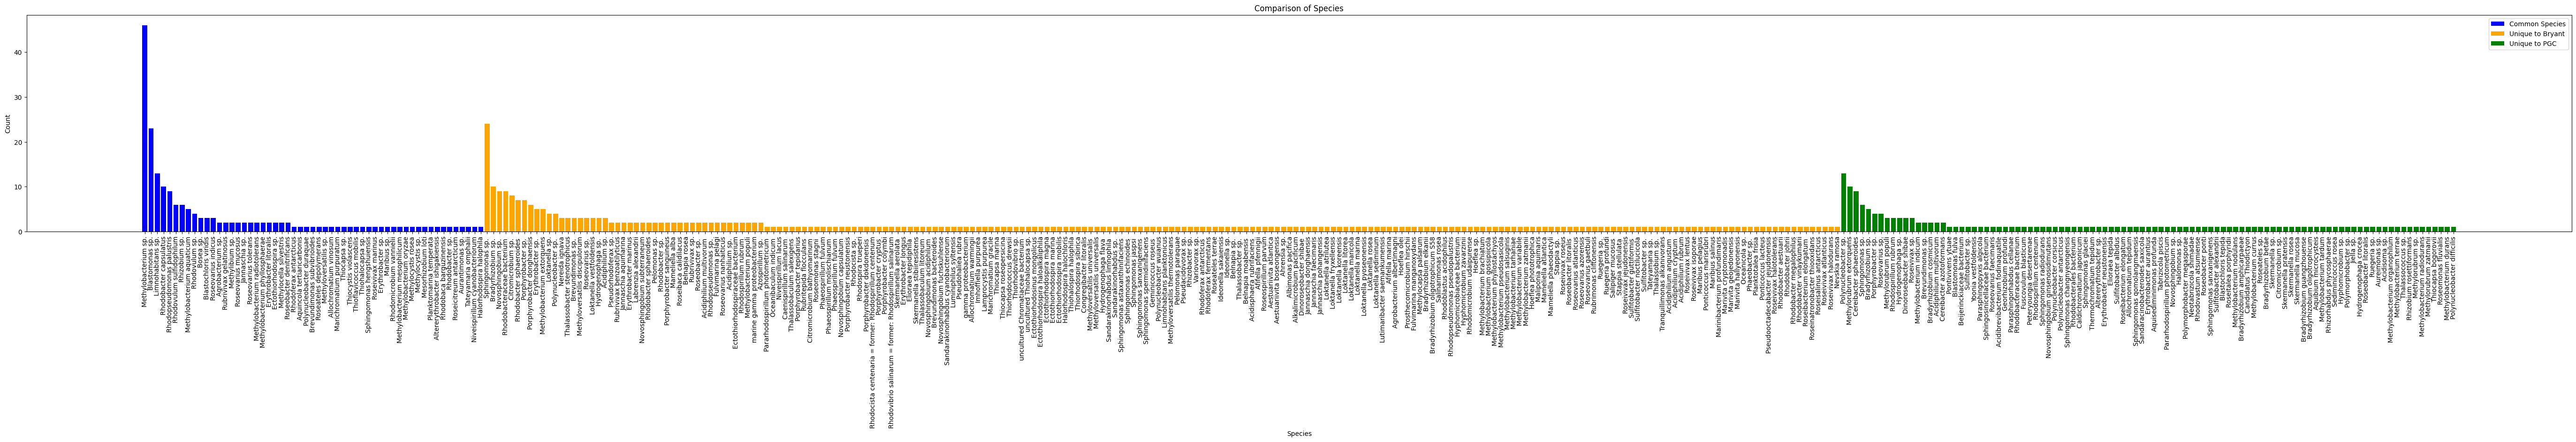

In [73]:
# Assuming PGC_species and bryant_species contain the species data as pandas Series objects

# Merge DataFrames (optional, if you need to compare other columns as well)
merged_df_species = pd.concat([bryant_species, PGC_species], axis=1, keys=['bryant_species', 'PGC_species'])

# Identify Common Species
common_species = merged_df_species['bryant_species'].dropna().loc[merged_df_species['bryant_species'].isin(merged_df_species['PGC_species'])]

# Identify Unique Species
unique_bryant_species = merged_df_species['bryant_species'][~merged_df_species['bryant_species'].isin(common_species)].dropna()
unique_PGC_species = merged_df_species['PGC_species'][~merged_df_species['PGC_species'].isin(common_species)].dropna()

# Count and Visualize
plt.figure(figsize=(70, 6))

# Common species
common_species_counts = common_species.value_counts()
plt.bar(common_species_counts.index, common_species_counts.values, color='blue', label='Common Species')

# Unique species
unique_bryant_species_counts = unique_bryant_species.value_counts()
unique_PGC_species_counts = unique_PGC_species.value_counts()
plt.bar(unique_bryant_species_counts.index, unique_bryant_species_counts.values, color='orange', label='Unique to Bryant')
plt.bar(unique_PGC_species_counts.index, unique_PGC_species_counts.values, color='green', label='Unique to PGC')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Comparison of Species')
plt.legend()
plt.xticks(rotation=90)
plt.show()

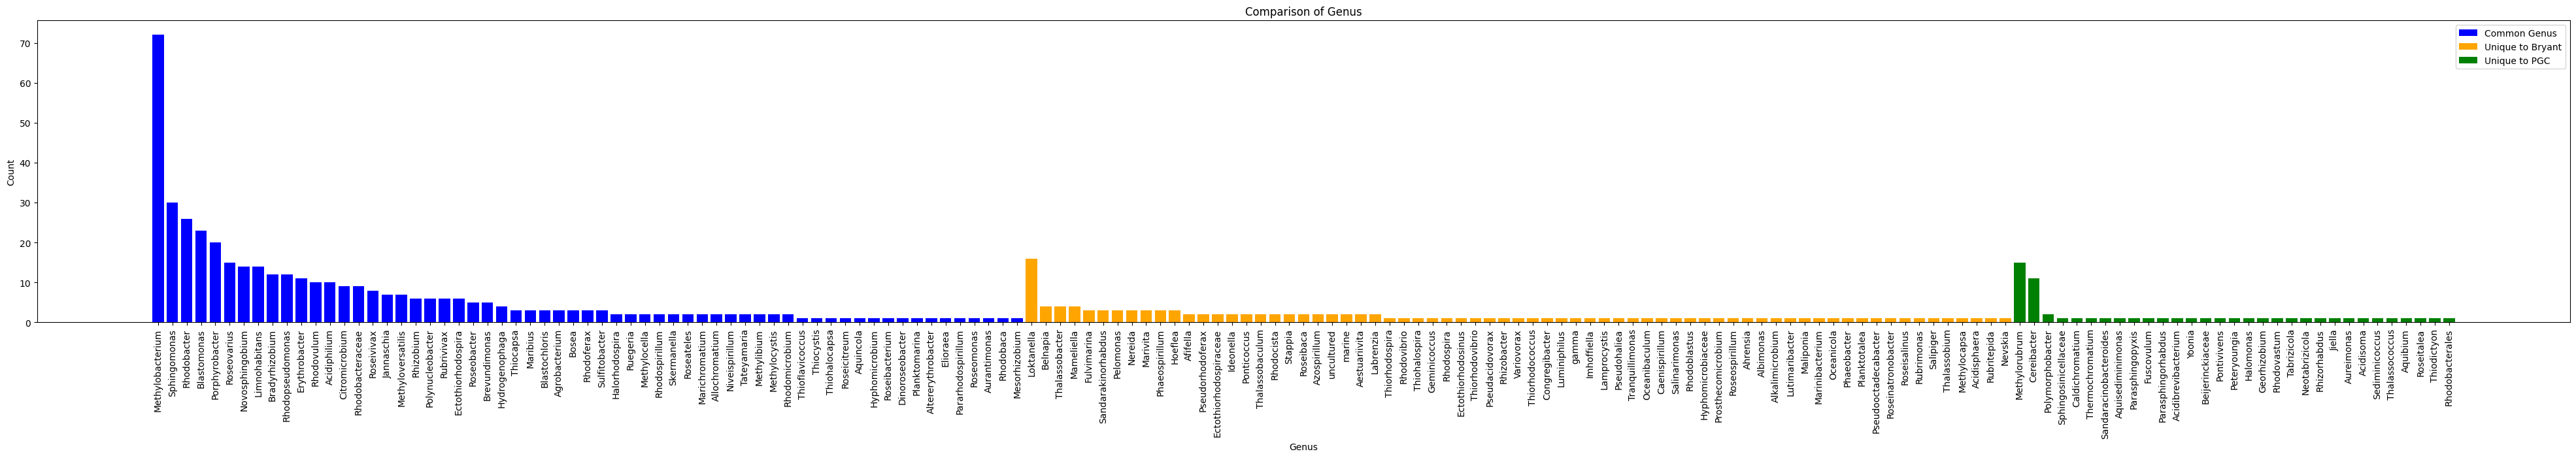

In [74]:
# Assuming PGC_species and bryant_species contain the species data as pandas Series objects

# Fonction pour vérifier et modifier les espèces
def process_species(species):
    parts = species.split()
    if len(parts) > 1 and parts[0].lower() == "candidatus":
        return parts[1]
    return parts[0]

# Appliquer la fonction à chaque série
bryant_genus = bryant_species.apply(process_species)
PGC_genus = PGC_species.apply(process_species)

# Merge DataFrames (optional, if you need to compare other columns as well)
merged_df_genus = pd.concat([bryant_genus, PGC_genus], axis=1, keys=['bryant_genus', 'PGC_genus'])

# Identify Common genus
common_genus = merged_df_genus['bryant_genus'].dropna().loc[merged_df_genus['bryant_genus'].isin(merged_df_genus['PGC_genus'])]

# Identify Unique genus
unique_bryant_genus= merged_df_genus['bryant_genus'][~merged_df_genus['bryant_genus'].isin(common_genus)].dropna()
unique_PGC_genus = merged_df_genus['PGC_genus'][~merged_df_genus['PGC_genus'].isin(common_genus)].dropna()

# Count and Visualize
plt.figure(figsize=(50, 6))

# Common genus
common_genus_counts = common_genus.value_counts()
plt.bar(common_genus_counts.index, common_genus_counts.values, color='blue', label='Common Genus')

# Unique genus
unique_bryant_genus_counts = unique_bryant_genus.value_counts()
unique_PGC_genus_counts = unique_PGC_genus.value_counts()
plt.bar(unique_bryant_genus_counts.index, unique_bryant_genus_counts.values, color='orange', label='Unique to Bryant')
plt.bar(unique_PGC_genus_counts.index, unique_PGC_genus_counts.values, color='green', label='Unique to PGC')

plt.xlabel('Genus')
plt.ylabel('Count')
plt.title('Comparison of Genus')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [75]:
# To have our df saved
common_genus_counts.to_csv('../results/Jupyter/common_genus_counts.csv')
unique_bryant_genus_counts.to_csv('../results/Jupyter/unique_bryant_genus_counts.csv')
unique_PGC_genus_counts.to_csv('../results/Jupyter/unique_PGC_genus_counts.csv')


In [107]:
# Here we have df with every informations from their original df on species with PGC predicted uniquely (PGCfinder vs Bryant)
# It's a list of informations for species uniquely found with PGCfinder or Bryant (contrary to common_genus)
bryant_all_unique = df_bryant[df_bryant['Organism_name'].apply(lambda x: any(val.lower() in x.lower() for val in unique_bryant_genus.drop_duplicates()))]
PGC_all_unique = df_all[df_all['#Organism Name'].apply(lambda x: any(val.lower() in x.lower() for val in unique_PGC_genus.drop_duplicates()))]

In [108]:
# To have our df saved
bryant_all_unique.to_csv('../results/Jupyter/bryant_all_unique.csv')
PGC_all_unique.to_csv('../results/Jupyter/PGC_all_unique.csv')